# Food Classification using keras VGG16 pretrained model

In [1]:
import os
import shutil

import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

C:\Users\Rehan Ali\.conda\envs\tf_gpu\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_ds = keras.preprocessing.image_dataset_from_directory('./4_project_data/train_imgs')

Found 13323 files belonging to 141 classes.


In [3]:
test_ds = keras.preprocessing.image_dataset_from_directory('./4_project_data/test_imgs', labels = None)

Found 484 files belonging to 1 classes.


In [4]:
classesNames = train_ds.class_names

# Importing pretrained model

In [5]:
pre_trained_model = keras.applications.vgg16.VGG16(input_shape = (256, 256, 3), include_top = False, weights = "imagenet" )
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

# Configuring model

In [8]:
# Custom model
model = keras.models.Sequential()

# Coping layers from pretrained model
for layer in pre_trained_model.layers[0: ]:
    model.add(layer)

# Making pretrained layers untrainable
for layer in model.layers:
    layer.trainable = False
    
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 64, 64, 256)      

In [9]:
# Adding flatten layer
model.add(keras.layers.Flatten())
# classes length for outputs
outputs = len(classesNames)
# Adding Dense (output) layer
model.add(keras.layers.Dense(outputs, activation='softmax'))

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 64, 64, 256)      

In [12]:
model.fit(x=train_ds, epochs=10)

Epoch 1/10
417/417 [==============================] - 191s 457ms/step - loss: 83.5934 - accuracy: 0.2733
Epoch 2/10
417/417 [==============================] - 191s 458ms/step - loss: 14.1462 - accuracy: 0.8401
Epoch 3/10
417/417 [==============================] - 192s 460ms/step - loss: 8.8582 - accuracy: 0.9023
Epoch 4/10
417/417 [==============================] - 192s 460ms/step - loss: 8.1467 - accuracy: 0.9135
Epoch 5/10
417/417 [==============================] - 192s 460ms/step - loss: 8.8345 - accuracy: 0.9168
Epoch 6/10
417/417 [==============================] - 192s 461ms/step - loss: 9.3829 - accuracy: 0.9147
Epoch 7/10
417/417 [==============================] - 192s 460ms/step - loss: 10.5735 - accuracy: 0.9133
Epoch 8/10
417/417 [==============================] - 192s 460ms/step - loss: 10.3658 - accuracy: 0.9223
Epoch 9/10
417/417 [==============================] - 191s 458ms/step - loss: 9.7139 - accuracy: 0.9325
Epoch 10/10
417/417 [==============================] - 192s 

In [17]:
loss = model.history.history['loss']
accuracy = model.history.history['accuracy']
epochs = range(10)

Text(0.5, 1.0, 'accuracy w.r.t epochs')

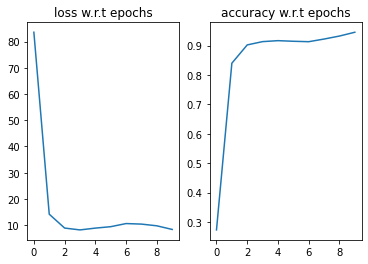

In [18]:
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(epochs, loss)
plt.title('loss w.r.t epochs')
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy)
plt.title('accuracy w.r.t epochs')

In [19]:
pred = model.predict(train_ds)

417/417 [==============================] - 188s 451ms/step


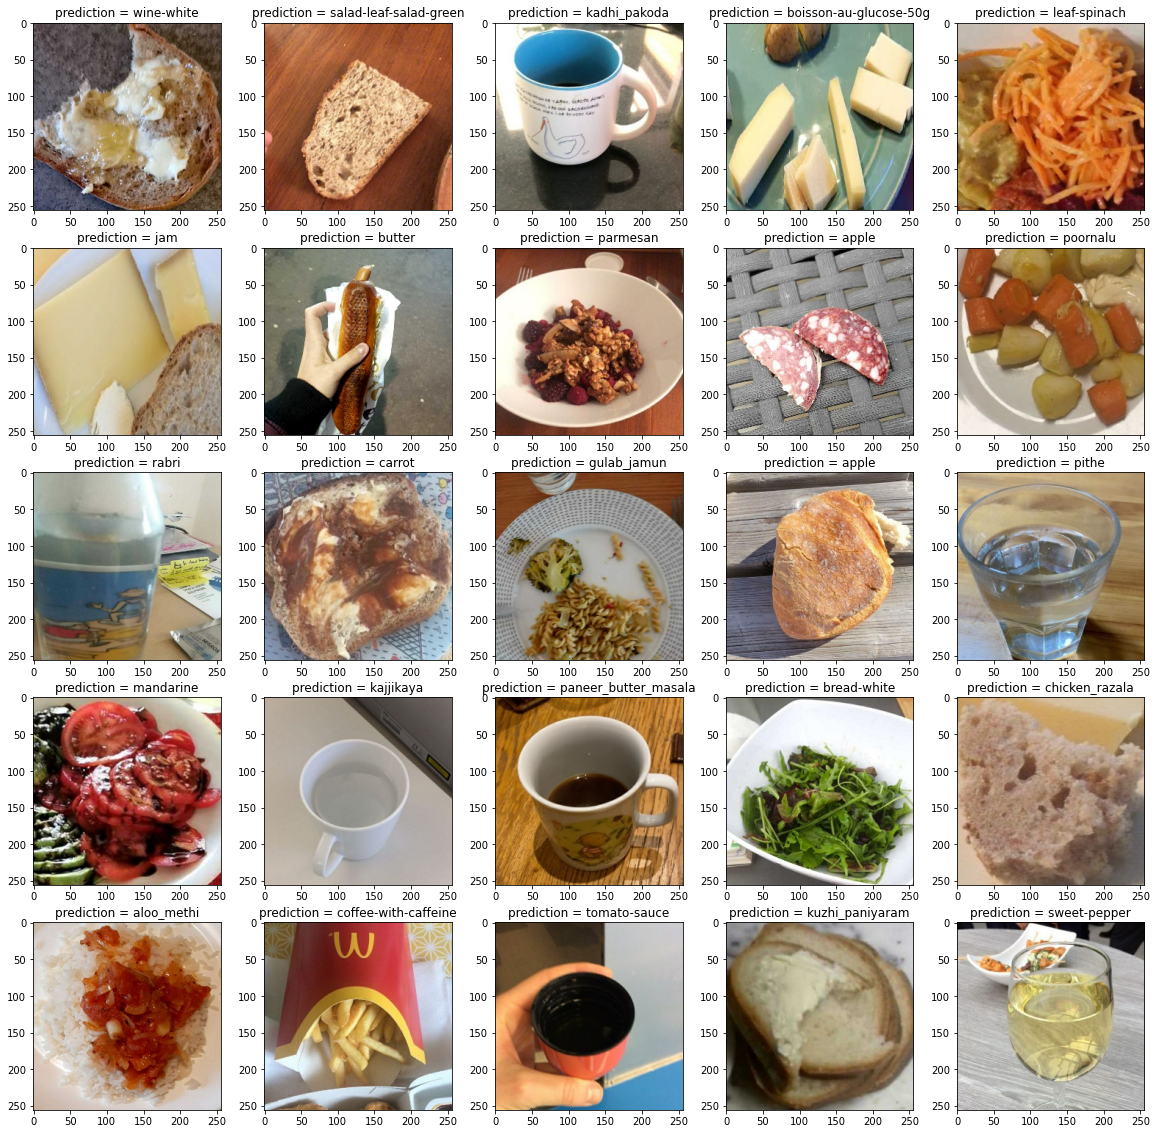

In [22]:
plt.figure(figsize=(20, 20))
for images in test_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f'prediction = {classesNames[np.argmax(pred[i])]}')